In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")
pd.set_option("display.max_columns", None)

df = pd.read_csv("Train.csv") 
print("Shape:", df.shape) 
df.head()

Shape: (10999, 12)


,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,D,Flight,4,2,177,3,low,F,44,1233,1
1,2,F,Flight,4,5,216,2,low,M,59,3088,1
2,3,A,Flight,2,2,183,4,low,M,48,3374,1
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1


In [2]:
print("Columns:", df.columns.tolist())
print("\nMissing values:\n", df.isnull().sum())
print("\nDuplicate rows:", df.duplicated().sum())

df.info()

Columns: ['ID', 'Warehouse_block', 'Mode_of_Shipment', 'Customer_care_calls', 'Customer_rating', 'Cost_of_the_Product', 'Prior_purchases', 'Product_importance', 'Gender', 'Discount_offered', 'Weight_in_gms', 'Reached.on.Time_Y.N']

Missing values:
 ID                     0
Warehouse_block        0
Mode_of_Shipment       0
Customer_care_calls    0
Customer_rating        0
Cost_of_the_Product    0
Prior_purchases        0
Product_importance     0
Gender                 0
Discount_offered       0
Weight_in_gms          0
Reached.on.Time_Y.N    0
dtype: int64

Duplicate rows: 0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999 entries, 0 to 10998
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   10999 non-null  int64 
 1   Warehouse_block      10999 non-null  object
 2   Mode_of_Shipment     10999 non-null  object
 3   Customer_care_calls  10999 non-null  int64 
 4   Customer_ra

In [3]:
df.describe()

,ID,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
count,10999.00000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000
mean,5500.00000,4.054459,2.990545,210.196836,3.567597,13.373216,3634.016729,0.596691
std,3175.28214,1.141490,1.413603,48.063272,1.522860,16.205527,1635.377251,0.490584
min,1.00000,2.000000,1.000000,96.000000,2.000000,1.000000,1001.000000,0.000000
25%,2750.50000,3.000000,2.000000,169.000000,3.000000,4.000000,1839.500000,0.000000
50%,5500.00000,4.000000,3.000000,214.000000,3.000000,7.000000,4149.000000,1.000000
75%,8249.50000,5.000000,4.000000,251.000000,4.000000,10.000000,5050.000000,1.000000
max,10999.00000,7.000000,5.000000,310.000000,10.000000,65.000000,7846.000000,1.000000


In [4]:
df.describe(include="object")

,Warehouse_block,Mode_of_Shipment,Product_importance,Gender
count,10999,10999,10999,10999
unique,5,3,3,2
top,F,Ship,low,F
freq,3666,7462,5297,5545


In [5]:
cat_cols = df.select_dtypes(include="object").columns.tolist()
num_cols = df.select_dtypes(exclude="object").columns.tolist()

print("Categorical:", cat_cols)
print("Numeric:", num_cols)

Categorical: ['Warehouse_block', 'Mode_of_Shipment', 'Product_importance', 'Gender']
Numeric: ['ID', 'Customer_care_calls', 'Customer_rating', 'Cost_of_the_Product', 'Prior_purchases', 'Discount_offered', 'Weight_in_gms', 'Reached.on.Time_Y.N']


In [6]:
miss = (df.isnull().mean()*100).sort_values(ascending=False)
miss = miss[miss > 0]
miss.to_frame("missing_%")

,missing_%


Reached.on.Time_Y.N
1    6563
0    4436
Name: count, dtype: int64
Reached.on.Time_Y.N
1    59.669061
0    40.330939
Name: proportion, dtype: float64


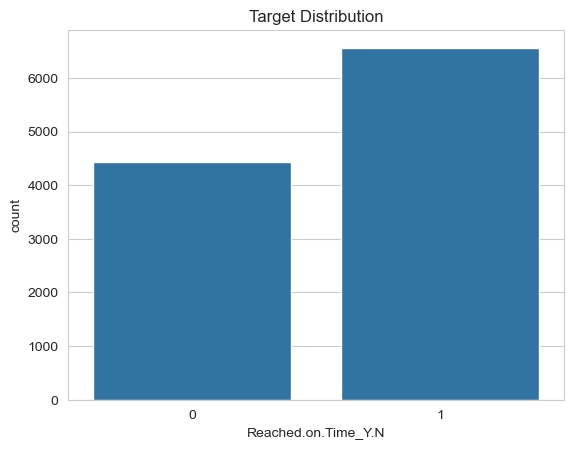

In [7]:
target = "Reached.on.Time_Y.N"
print(df[target].value_counts())
print(df[target].value_counts(normalize=True)*100)

sns.countplot(x=df[target])
plt.title("Target Distribution")
plt.show()

In [8]:
for col in cat_cols:
    print("\n---", col, "---")
    print(df[col].value_counts().head(10))


--- Warehouse_block ---
Warehouse_block
F    3666
D    1834
A    1833
B    1833
C    1833
Name: count, dtype: int64

--- Mode_of_Shipment ---
Mode_of_Shipment
Ship      7462
Flight    1777
Road      1760
Name: count, dtype: int64

--- Product_importance ---
Product_importance
low       5297
medium    4754
high       948
Name: count, dtype: int64

--- Gender ---
Gender
F    5545
M    5454
Name: count, dtype: int64


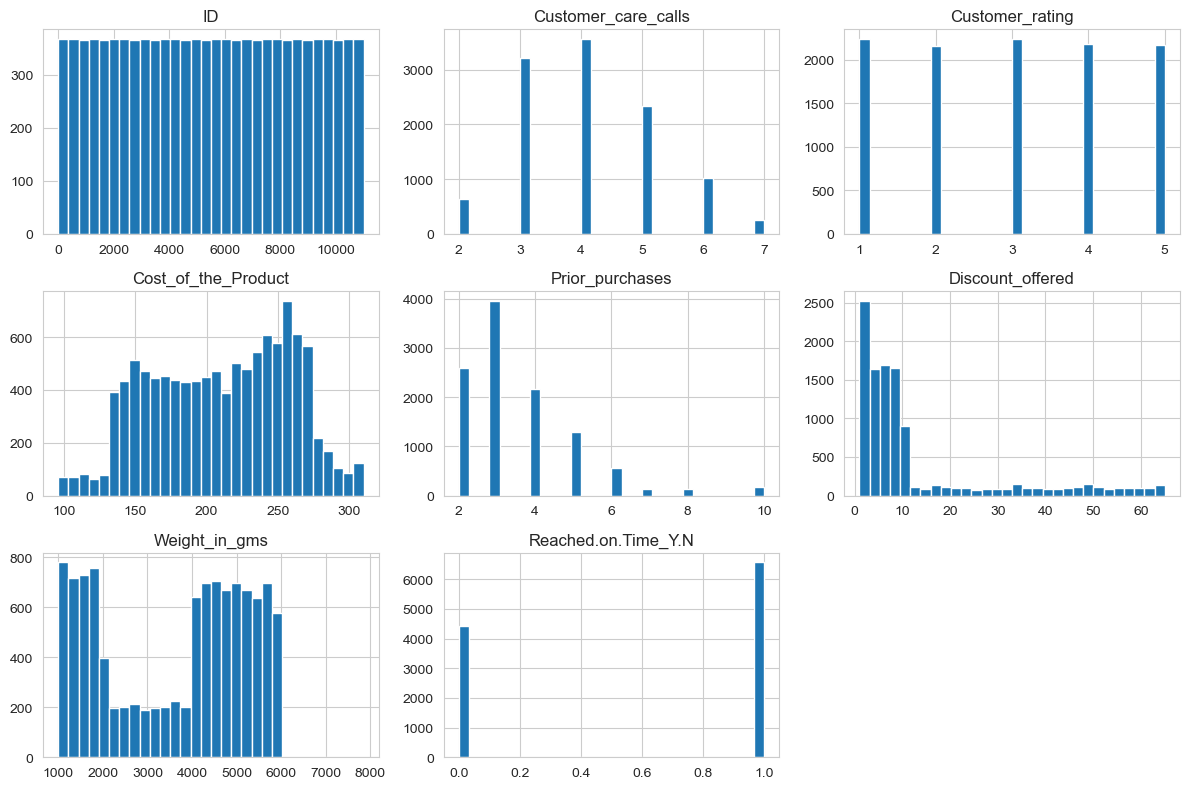

In [9]:
df[num_cols].hist(figsize=(12,8), bins=30)
plt.tight_layout()
plt.show()

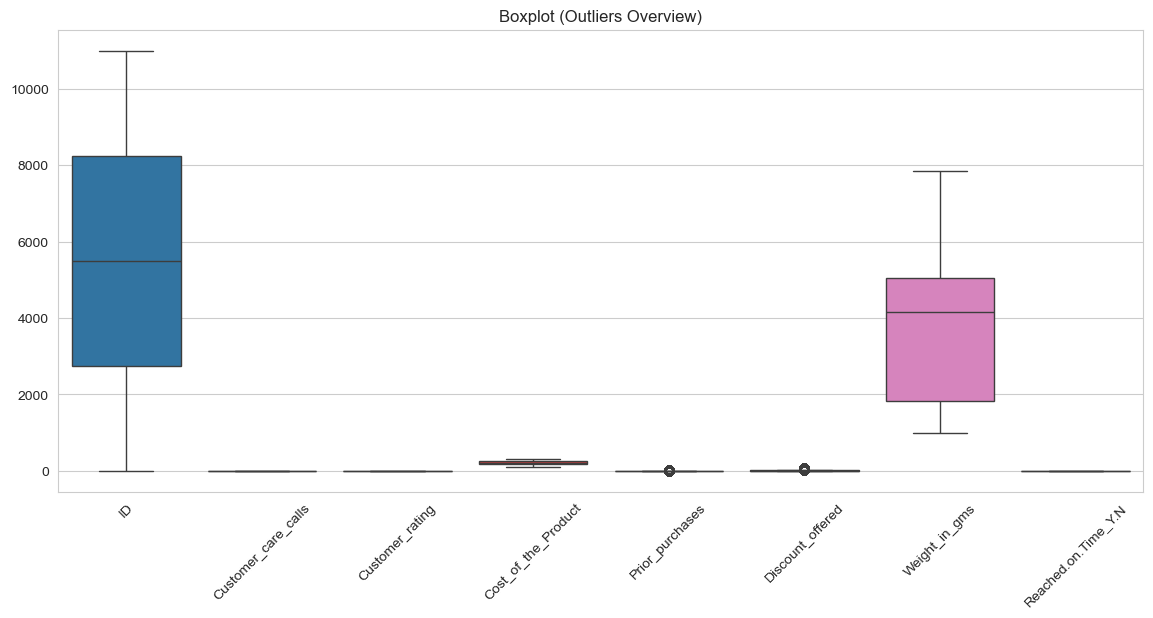

In [10]:
plt.figure(figsize=(14,6))
sns.boxplot(data=df[num_cols])
plt.xticks(rotation=45)
plt.title("Boxplot (Outliers Overview)")
plt.show()

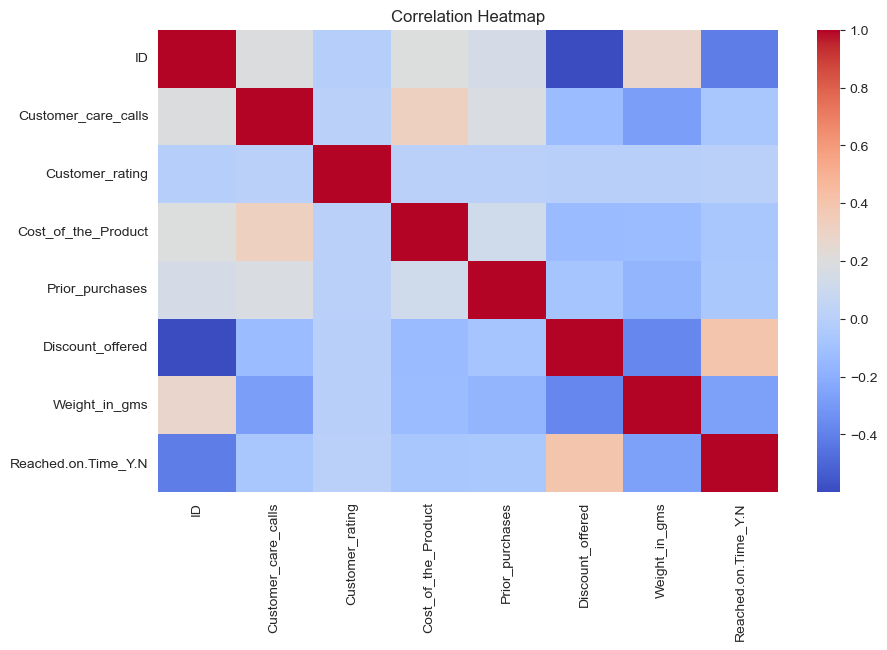

In [11]:
plt.figure(figsize=(10,6))
sns.heatmap(df[num_cols].corr(), annot=False, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

In [12]:
group_means = df.groupby(target)[num_cols].mean()
group_means

,ID,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
Reached.on.Time_Y.N,,,,,,,,
0,7090.479486,4.147656,2.967989,214.498647,3.670424,5.545987,4168.668395,0.0
1,4424.978364,3.991467,3.005790,207.289197,3.498095,18.663721,3272.640104,1.0


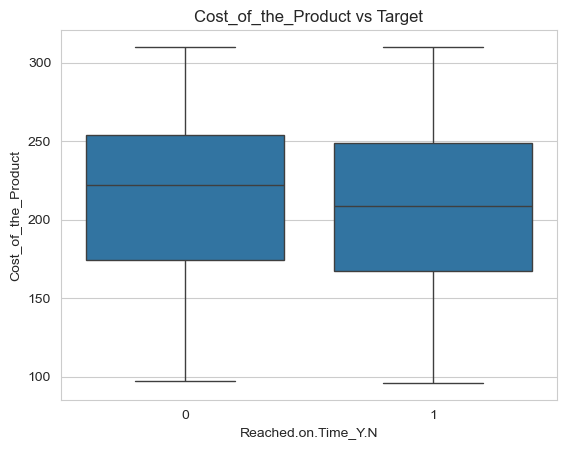

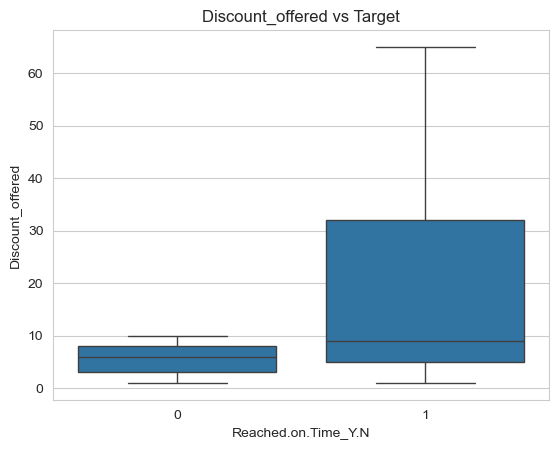

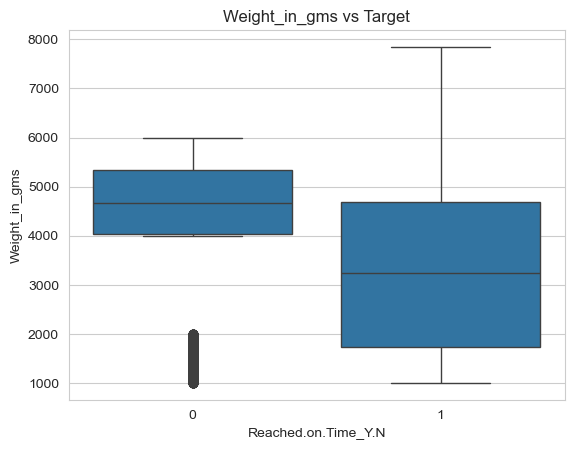

In [13]:
key_features = ["Cost_of_the_Product", "Discount_offered", "Weight_in_gms"]

for col in key_features:
    if col in df.columns:
        sns.boxplot(x=df[target], y=df[col])
        plt.title(f"{col} vs Target")
        plt.show()

In [14]:
for col in cat_cols:
    ct = pd.crosstab(df[col], df[target], normalize="index") * 100
    print("\n", col)
    display(ct.round(2))


 Warehouse_block


Reached.on.Time_Y.N,0,1
Warehouse_block,,
A,41.35,58.65
B,39.77,60.23
C,40.32,59.68
D,40.24,59.76
F,40.15,59.85



 Mode_of_Shipment


Reached.on.Time_Y.N,0,1
Mode_of_Shipment,,
Flight,39.84,60.16
Road,41.19,58.81
Ship,40.24,59.76



 Product_importance


Reached.on.Time_Y.N,0,1
Product_importance,,
high,35.02,64.98
low,40.72,59.28
medium,40.95,59.05



 Gender


Reached.on.Time_Y.N,0,1
Gender,,
F,40.56,59.44
M,40.10,59.90


In [16]:
df_clean = df.drop_duplicates().reset_index(drop=True)
df_clean.to_csv(".full_dataset_clean.csv", index=False)
print("Saved: .full_dataset_clean.csv")

Saved: .full_dataset_clean.csv
